# pyspark version

In [1]:
import pyspark
print(pyspark.__version__)

2.4.4


# Start

In [2]:
from pyspark import SparkContext; sc = SparkContext()
from pyspark.sql import SQLContext; spark = SQLContext(sc)
#df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('DW_Project_users.csv')
#df=spark.read.csv('DW_Project_users.csv')

In [3]:
def load_csv_into_dataframe(file_name):
    df = spark.read.format('com.databricks.spark.csv')\
        .option("encoding", "euc-kr")\
        .options(header='true', inferschema='true')\
        .load(file_name)
    return df

In [4]:
def overview_dataframe(df):
    df.printSchema()
    df.show(5)

# Load TABLES:

### student_answer_logs TABLE (type undefined)

In [5]:
student_answer_logs = load_csv_into_dataframe('../data/DW Project/DW_Project_student_answer_logs.csv')

In [6]:
overview_dataframe(student_answer_logs)

root
 |-- student_answer_log_id: string (nullable = true)
 |-- answer: string (nullable = true)
 |-- score: string (nullable = true)
 |-- ratio: string (nullable = true)
 |-- count: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- updated_at: string (nullable = true)
 |-- class_id: string (nullable = true)
 |-- lecture_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- question_id: string (nullable = true)
 |-- student_id: string (nullable = true)

+---------------------+------+-----+-----+-----+----------------+----------------+--------+----------+-------+-----------+----------+
|student_answer_log_id|answer|score|ratio|count|      created_at|      updated_at|class_id|lecture_id|item_id|question_id|student_id|
+---------------------+------+-----+-----+-----+----------------+----------------+--------+----------+-------+-----------+----------+
|                 3848|     1|   10|    1|    1|2019-04-03 14:11|2019-04-03 14:11|       6|       10

### student_answer_logs TABLE (type defined)

In [7]:
from pyspark.sql.types import *
student_answer_logs = student_answer_logs.withColumn('student_answer_log_id', student_answer_logs['student_answer_log_id'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('answer', student_answer_logs['answer'].cast(StringType()))
student_answer_logs = student_answer_logs.withColumn('score', student_answer_logs['score'].cast(DoubleType()))
student_answer_logs = student_answer_logs.withColumn('ratio', student_answer_logs['ratio'].cast(DoubleType()))
student_answer_logs = student_answer_logs.withColumn('count', student_answer_logs['count'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('created_at', student_answer_logs['created_at'].cast(TimestampType()))
student_answer_logs = student_answer_logs.withColumn('updated_at', student_answer_logs['updated_at'].cast(TimestampType()))
student_answer_logs = student_answer_logs.withColumn('class_id', student_answer_logs['class_id'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('lecture_id', student_answer_logs['lecture_id'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('item_id', student_answer_logs['item_id'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('question_id', student_answer_logs['question_id'].cast(IntegerType()))
student_answer_logs = student_answer_logs.withColumn('student_id', student_answer_logs['student_id'].cast(IntegerType()))

In [8]:
overview_dataframe(student_answer_logs)

root
 |-- student_answer_log_id: integer (nullable = true)
 |-- answer: string (nullable = true)
 |-- score: double (nullable = true)
 |-- ratio: double (nullable = true)
 |-- count: integer (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- updated_at: timestamp (nullable = true)
 |-- class_id: integer (nullable = true)
 |-- lecture_id: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- question_id: integer (nullable = true)
 |-- student_id: integer (nullable = true)

+---------------------+------+-----+-----+-----+-------------------+-------------------+--------+----------+-------+-----------+----------+
|student_answer_log_id|answer|score|ratio|count|         created_at|         updated_at|class_id|lecture_id|item_id|question_id|student_id|
+---------------------+------+-----+-----+-----+-------------------+-------------------+--------+----------+-------+-----------+----------+
|                 3848|     1| 10.0|  1.0|    1|2019-04-03 14:11:00|2

### questions TABLE (type undefined)

In [9]:
questions = load_csv_into_dataframe('../data/DW Project/DW_Project_questions.csv')

In [10]:
overview_dataframe(questions)

root
 |-- question_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- answer: string (nullable = true)
 |-- score: double (nullable = true)
 |-- difficulty: string (nullable = true)
 |-- lecture_item_id: double (nullable = true)
 |-- creator_id: string (nullable = true)

+-----------+----+------+-----+----------+---------------+----------+
|question_id|type|answer|score|difficulty|lecture_item_id|creator_id|
+-----------+----+------+-----+----------+---------------+----------+
|        245|   0|     1| 10.0|         4|          449.0|        64|
|        106|   0|     3| 10.0|         3|          215.0|        61|
|        107|   0|     3|  1.0|         3|          216.0|        61|
|        125|   0|     3| 10.0|         3|          245.0|        61|
|        222|   0|     2| 40.0|         2|          424.0|      null|
+-----------+----+------+-----+----------+---------------+----------+
only showing top 5 rows



### questions TABLE (type defined)

In [11]:
from pyspark.sql.types import *
questions = questions.withColumn('question_id', questions['question_id'].cast(IntegerType()))
questions = questions.withColumn('type', questions['type'].cast(IntegerType()))
questions = questions.withColumn('answer', questions['answer'].cast(StringType()))
questions = questions.withColumn('score', questions['score'].cast(DoubleType()))
questions = questions.withColumn('difficulty', questions['difficulty'].cast(IntegerType()))
questions = questions.withColumn('lecture_item_id', questions['lecture_item_id'].cast(IntegerType()))
questions = questions.withColumn('creator_id', questions['creator_id'].cast(IntegerType()))

In [12]:
overview_dataframe(questions)

root
 |-- question_id: integer (nullable = true)
 |-- type: integer (nullable = true)
 |-- answer: string (nullable = true)
 |-- score: double (nullable = true)
 |-- difficulty: integer (nullable = true)
 |-- lecture_item_id: integer (nullable = true)
 |-- creator_id: integer (nullable = true)

+-----------+----+------+-----+----------+---------------+----------+
|question_id|type|answer|score|difficulty|lecture_item_id|creator_id|
+-----------+----+------+-----+----------+---------------+----------+
|        245|   0|     1| 10.0|         4|            449|        64|
|        106|   0|     3| 10.0|         3|            215|        61|
|        107|   0|     3|  1.0|         3|            216|        61|
|        125|   0|     3| 10.0|         3|            245|        61|
|        222|   0|     2| 40.0|         2|            424|      null|
+-----------+----+------+-----+----------+---------------+----------+
only showing top 5 rows



# Define TABLES:

### student_answer_logs TABLE & question TABLE

In [13]:
#from pyspark.sql.functions import *
df1 = student_answer_logs.alias('df1')
df2 = questions.alias('df2')

### time DIMENSION TABLE

In [14]:
import datetime
from pyspark.sql.functions import year, month, dayofmonth
dimension_time = df1.select(
    df1['student_answer_log_id'].alias('time_id'),
    year("updated_at").alias('year'),
    month("updated_at").alias('month'),
    dayofmonth("updated_at").alias('day')
)

In [15]:
overview_dataframe(dimension_time)

root
 |-- time_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)

+-------+----+-----+---+
|time_id|year|month|day|
+-------+----+-----+---+
|   3848|2019|    4|  3|
|   3849|2019|    4|  3|
|   3855|2019|    4|  3|
|   3856|2019|    4|  3|
|   3857|2019|    4|  3|
+-------+----+-----+---+
only showing top 5 rows



### updated_at DIMENSION TABLE

In [16]:
import datetime
from pyspark.sql.functions import hour, minute
dimension_updated_at = df1.select(
    df1['student_answer_log_id'].alias('updated_at_id'),
    hour('updated_at').alias('hour'),
    minute('updated_at').alias('minute'),
)

In [17]:
overview_dataframe(dimension_updated_at)

root
 |-- updated_at_id: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)

+-------------+----+------+
|updated_at_id|hour|minute|
+-------------+----+------+
|         3848|  14|    11|
|         3849|  14|    12|
|         3855|  14|    12|
|         3856|  14|    12|
|         3857|  14|    12|
+-------------+----+------+
only showing top 5 rows



### count DIMENSION TABLE

In [18]:
#dimension_count = df1.select(df1['student_answer_log_id'], df1['count'])
#dimension_count = dimension_count.toDF('count_id', 'count')
dimension_count = df1.select(
    df1['student_answer_log_id'].alias('count_id'),
    df1['count'].alias('count')
)

In [19]:
overview_dataframe(dimension_count)

root
 |-- count_id: integer (nullable = true)
 |-- count: integer (nullable = true)

+--------+-----+
|count_id|count|
+--------+-----+
|    3848|    1|
|    3849|    2|
|    3855|    1|
|    3856|    1|
|    3857|    1|
+--------+-----+
only showing top 5 rows



### new_student_answer_logs TABLE

In [20]:
new_student_answer_logs = df1.join(df2, df1.question_id == df2.question_id).select(df1['student_answer_log_id'], df1['ratio'], df1['question_id'], df2['type'], df2['difficulty'])
df1_new = new_student_answer_logs.alias('df1_new')

### type DIMENSION TABLE

In [21]:
#dimension_type = df1_new.select(df1_new['student_answer_log_id'], df1_new['type'])
#dimension_type = dimension_type.toDF('type_id', 'type')
dimension_type = df1_new.select(
    df1_new['student_answer_log_id'].alias('type_id'),
    df1_new['type'].alias('type')
)

In [22]:
overview_dataframe(dimension_type)

root
 |-- type_id: integer (nullable = true)
 |-- type: integer (nullable = true)

+-------+----+
|type_id|type|
+-------+----+
|   3848|   0|
|   3849|   0|
|   3855|   0|
|   3856|   0|
|   3857|   0|
+-------+----+
only showing top 5 rows



### difficulty DIMENSION TABLE

In [23]:
#dimension_difficulty = df1_new.select(df1_new['student_answer_log_id'], df1_new['difficulty'])
#dimension_difficulty = dimension_difficulty.toDF('difficulty_id', 'difficulty')
dimension_difficulty = df1_new.select(
    df1_new['student_answer_log_id'].alias('difficulty_id'),
    df1_new['difficulty'].alias('difficulty')
)

In [24]:
overview_dataframe(dimension_difficulty)

root
 |-- difficulty_id: integer (nullable = true)
 |-- difficulty: integer (nullable = true)

+-------------+----------+
|difficulty_id|difficulty|
+-------------+----------+
|         3848|         4|
|         3849|         4|
|         3855|         4|
|         3856|         4|
|         3857|         4|
+-------------+----------+
only showing top 5 rows



### ratio FACT TABLE

In [25]:
#fact_ratio = df1_new.select(df1_new['student_answer_log_id'], df1_new['student_answer_log_id'], df1_new['student_answer_log_id'], df1_new['student_answer_log_id'], df1_new['student_answer_log_id'], df1_new['ratio'])
#fact_ratio = fact_ratio.toDF('type_id', 'difficulty_id', 'time_id', 'updated_at_id', 'count_id', 'ratio')
fact_ratio = df1_new.select(
    df1_new['student_answer_log_id'].alias('type_id'),
    df1_new['student_answer_log_id'].alias('difficulty_id'),
    df1_new['student_answer_log_id'].alias('time_id'),
    df1_new['student_answer_log_id'].alias('updated_at_id'),
    df1_new['student_answer_log_id'].alias('count_id'),
    df1_new['ratio'].alias('ratio')
)

In [26]:
overview_dataframe(fact_ratio)

root
 |-- type_id: integer (nullable = true)
 |-- difficulty_id: integer (nullable = true)
 |-- time_id: integer (nullable = true)
 |-- updated_at_id: integer (nullable = true)
 |-- count_id: integer (nullable = true)
 |-- ratio: double (nullable = true)

+-------+-------------+-------+-------------+--------+-----+
|type_id|difficulty_id|time_id|updated_at_id|count_id|ratio|
+-------+-------------+-------+-------------+--------+-----+
|   3848|         3848|   3848|         3848|    3848|  1.0|
|   3849|         3849|   3849|         3849|    3849|  1.0|
|   3855|         3855|   3855|         3855|    3855|  0.0|
|   3856|         3856|   3856|         3856|    3856|  1.0|
|   3857|         3857|   3857|         3857|    3857|  1.0|
+-------+-------------+-------+-------------+--------+-----+
only showing top 5 rows



# Data analysis

## funtion for schema join

In [27]:
table_key_dict = {
    dimension_time: 'time_id',
    dimension_updated_at: 'updated_at_id',
    dimension_count: 'count_id',
    dimension_type: 'type_id',
    dimension_difficulty: 'difficulty_id'
}

In [28]:
def join_schemas(fact_table, *args):
    for i in args:
        fact_table = fact_table.join(i, fact_table[table_key_dict[i]] == i[table_key_dict[i]]).select(i['*'], fact_table['*'])
        fact_table = fact_table.drop(i[table_key_dict[i]])
    return fact_table

## dictionary of various joined schemas

In [29]:
datamart_2d_dict = {
    'time-ratio': join_schemas(fact_ratio, dimension_time),
    'updated_at-ratio': join_schemas(fact_ratio, dimension_updated_at),
    'count-ratio': join_schemas(fact_ratio, dimension_count),
    'type-ratio': join_schemas(fact_ratio, dimension_type),
    'difficulty-ratio': join_schemas(fact_ratio, dimension_difficulty)
}

datamart_3d_dict = {
    'difficulty-time-ratio': join_schemas(fact_ratio, dimension_time, dimension_difficulty),
    'difficulty-updated_at-ratio': join_schemas(fact_ratio, dimension_updated_at, dimension_difficulty),
    'difficulty-count-ratio': join_schemas(fact_ratio, dimension_count, dimension_difficulty),
    'difficulty-type-ratio': join_schemas(fact_ratio, dimension_type, dimension_difficulty),
    'type-time-ratio': join_schemas(fact_ratio, dimension_time, dimension_type),
    'type-updated_at-ratio': join_schemas(fact_ratio, dimension_updated_at, dimension_type),
    'type-count-ratio': join_schemas(fact_ratio, dimension_count, dimension_type)
}

datamart_4d_dict = {
    'difficulty-type-time-ratio': join_schemas(fact_ratio, dimension_time, dimension_type, dimension_difficulty),
    'difficulty-type-updated_at-ratio': join_schemas(fact_ratio, dimension_updated_at, dimension_type, dimension_difficulty),
    'difficulty-type-count-ratio': join_schemas(fact_ratio, dimension_count, dimension_type, dimension_difficulty)
}

In [30]:
df_time_ratio = datamart_2d_dict['time-ratio']
df_updated_at_ratio = datamart_2d_dict['updated_at-ratio']
df_count_ratio = datamart_2d_dict['count-ratio']
df_type_ratio = datamart_2d_dict['type-ratio']
df_difficulty_ratio = datamart_2d_dict['difficulty-ratio']

In [31]:
df_difficulty_time_ratio = datamart_3d_dict['difficulty-time-ratio']
df_difficulty_updated_at_ratio = datamart_3d_dict['difficulty-updated_at-ratio']
df_difficulty_count_ratio = datamart_3d_dict['difficulty-count-ratio']
df_difficulty_type_ratio = datamart_3d_dict['difficulty-type-ratio']
df_type_time_ratio = datamart_3d_dict['type-time-ratio']
df_type_updated_at_ratio = datamart_3d_dict['type-updated_at-ratio']
df_type_count_ratio = datamart_3d_dict['type-count-ratio']

In [32]:
df_difficulty_type_time_ratio = datamart_4d_dict['difficulty-type-time-ratio']
df_difficulty_type_updated_at_ratio = datamart_4d_dict['difficulty-type-updated_at-ratio']
df_difficulty_type_count_ratio = datamart_4d_dict['difficulty-type-count-ratio']

## [2d] function for analysis (ver1)

In [33]:
import matplotlib.pyplot as plt
def analysis_2d_ver1(df, attribute):
    df = df.select(df[attribute], df.ratio)
    pdf = df.toPandas()
    pdf = pdf.dropna()
    pdf.plot.scatter(x=attribute, y='ratio', alpha=0.03)
    plt.savefig('./result/2d_' + attribute + '_ratio_ver1.png')

## [2d] function for analysis (ver2)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
def analysis_2d_ver2(df, attribute):
    df = df.select(df[attribute], df.ratio)
    pdf = df.toPandas()
    #check_and_print_nan_value(pdf, attribute)
    pdf = pdf.dropna()
    #check_and_print_nan_value(pdf, attribute)
    nppdf = pdf.values
    x = nppdf[:, 0]
    y = nppdf[:, 1]
    nppdf = np.vstack([x, y])
    color_kernel = gaussian_kde(nppdf)(nppdf)
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=color_kernel)
    ax.set_xlabel(attribute)
    ax.set_ylabel('ratio')
    
    plt.savefig('./result/2d_' + attribute + '_ratio_ver2.png')
    
    plt.show()

### [2d] ratio distirbution for each month (since there were only 2019 data, we didn't analyze in aspect of year)

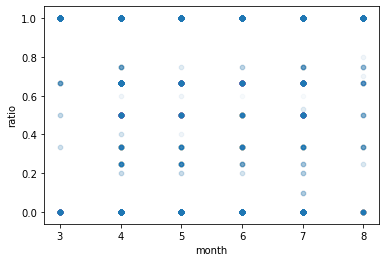

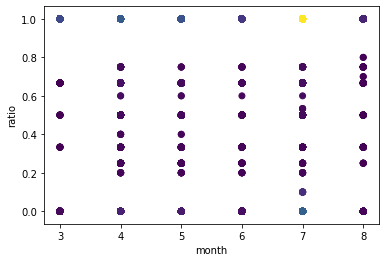

In [35]:
analysis_2d_ver1(df_time_ratio, 'month')
analysis_2d_ver2(df_time_ratio, 'month')

### [2d] ratio distribution for each hour

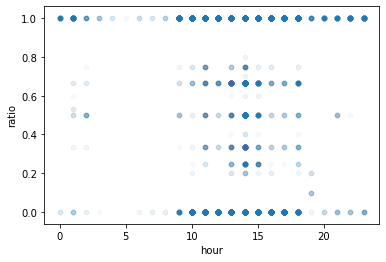

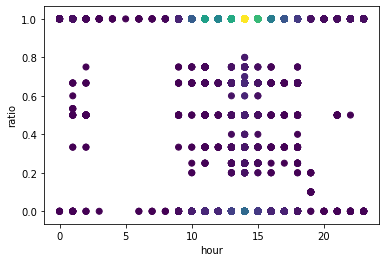

In [36]:
analysis_2d_ver1(df_updated_at_ratio, 'hour')
analysis_2d_ver2(df_updated_at_ratio, 'hour')

### [2d] ratio distirbution for each count

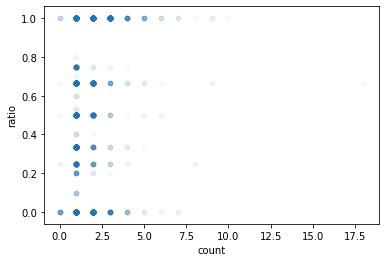

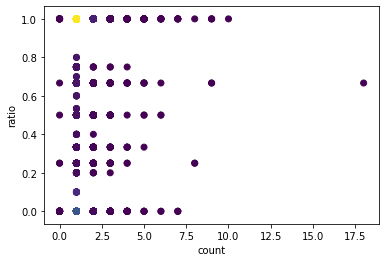

In [37]:
analysis_2d_ver1(df_count_ratio, 'count')
analysis_2d_ver2(df_count_ratio, 'count')

### [2d] ratio distirbution for each type

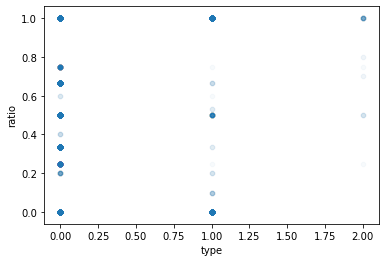

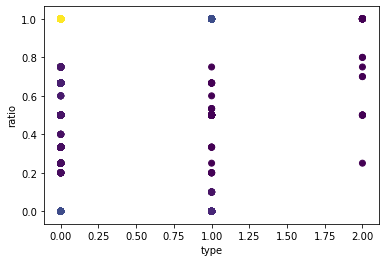

In [38]:
analysis_2d_ver1(df_type_ratio, 'type')
analysis_2d_ver2(df_type_ratio, 'type')

### [2d] ratio distirbution for each difficulty

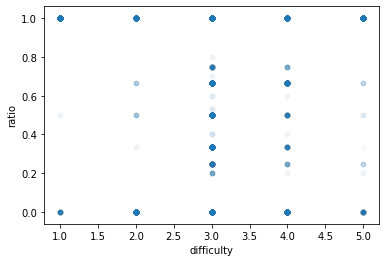

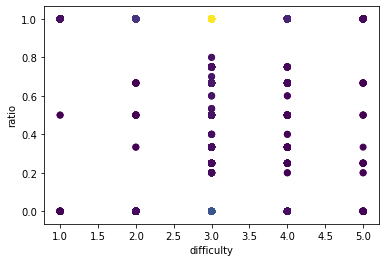

In [39]:
analysis_2d_ver1(df_difficulty_ratio, 'difficulty')
analysis_2d_ver2(df_difficulty_ratio, 'difficulty')

## [3d] function for analysis (ver1)

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def analysis_3d_ver1(df, attribute1, attribute2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = df.select(df[attribute1], df[attribute2], df.ratio)
    pdf = df.toPandas()
    #check_and_print_nan_value(pdf, attribute1, attribute2)
    pdf = pdf.dropna()
    #check_and_print_nan_value(pdf, attribute1, attribute2)
    nppdf = pdf.values
    x = nppdf[:, 0]
    y = nppdf[:, 1]
    z = nppdf[:, 2]
    ax.scatter(x, y, z, cmap=plt.hot(), alpha=0.3)
    ax.set_xlabel(attribute1)
    ax.set_ylabel(attribute2)
    ax.set_zlabel('ratio')
    
    plt.savefig('./result/3d_' + attribute1 + '_' + attribute2 + '_ratio_ver1.png')
    
    plt.show()

## [3d] function for analysis (ver2)

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
def analysis_3d_ver2(df, attribute1, attribute2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = df.select(df[attribute1], df[attribute2], df.ratio)
    pdf = df.toPandas()
    #check_and_print_nan_value(pdf, attribute1, attribute2)
    pdf = pdf.dropna()
    #check_and_print_nan_value(pdf, attribute1, attribute2)
    nppdf = pdf.values
    x = nppdf[:, 0]
    y = nppdf[:, 1]
    z = nppdf[:, 2]
    nppdf = np.vstack([x, y, z])
    color_kernel = gaussian_kde(nppdf)(nppdf)
    ax.scatter(x, y, z, c=color_kernel, cmap=plt.hot())
    ax.set_xlabel(attribute1)
    ax.set_ylabel(attribute2)
    ax.set_zlabel('ratio')
    
    plt.savefig('./result/3d_' + attribute1 + '_' + attribute2 + '_ratio_ver2.png')
    
    plt.show()

### [3d] ratio distirbution for each difficulty & month

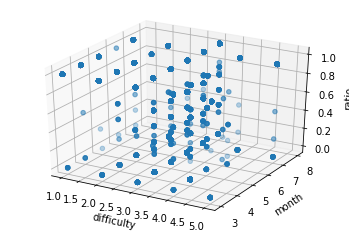

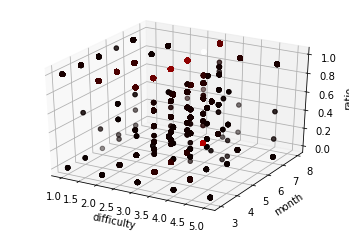

In [42]:
analysis_3d_ver1(df_difficulty_time_ratio, 'difficulty', 'month')
analysis_3d_ver2(df_difficulty_time_ratio, 'difficulty', 'month')

### [3d] ratio distirbution for each difficulty & hour

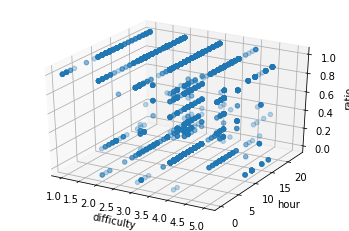

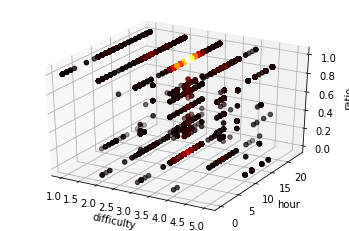

In [43]:
analysis_3d_ver1(df_difficulty_updated_at_ratio, 'difficulty', 'hour')
analysis_3d_ver2(df_difficulty_updated_at_ratio, 'difficulty', 'hour')

### [3d] ratio distirbution for each difficulty & count

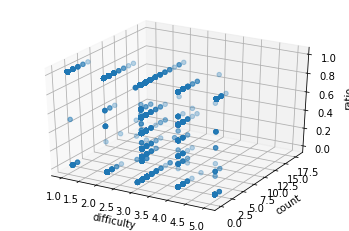

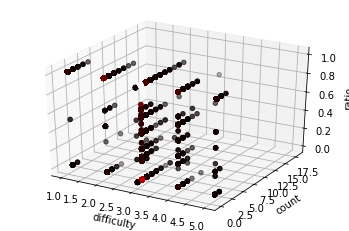

In [44]:
analysis_3d_ver1(df_difficulty_count_ratio, 'difficulty', 'count')
analysis_3d_ver2(df_difficulty_count_ratio, 'difficulty', 'count')

### [3d] ratio distirbution for each difficulty & type

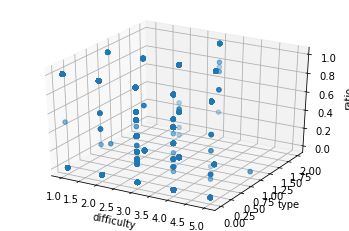

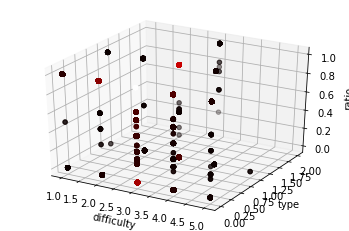

In [45]:
analysis_3d_ver1(df_difficulty_type_ratio, 'difficulty', 'type')
analysis_3d_ver2(df_difficulty_type_ratio, 'difficulty', 'type')

### [3d] ratio distirbution for each type & month

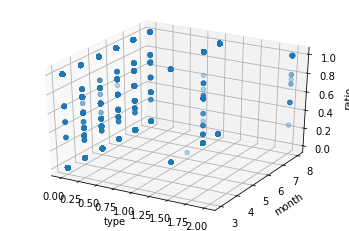

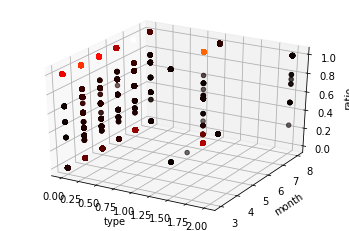

In [46]:
analysis_3d_ver1(df_type_time_ratio, 'type', 'month')
analysis_3d_ver2(df_type_time_ratio, 'type', 'month')

### [3d] ratio distirbution for each type & hour

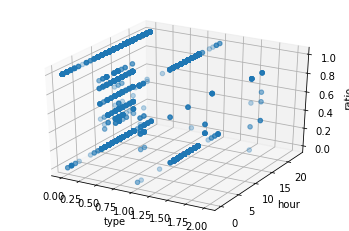

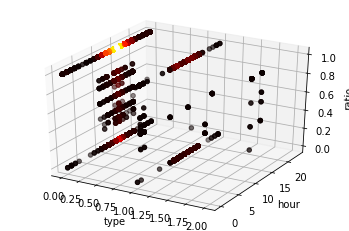

In [47]:
analysis_3d_ver1(df_type_updated_at_ratio, 'type', 'hour')
analysis_3d_ver2(df_type_updated_at_ratio, 'type', 'hour')

### [3d] ratio distirbution for each type & count

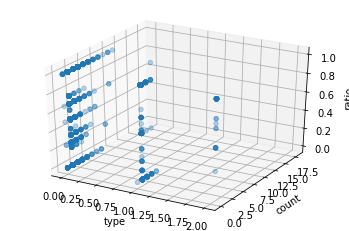

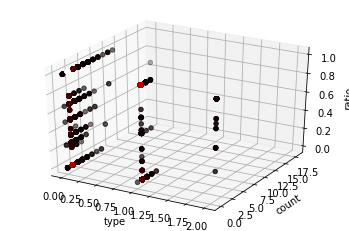

In [48]:
analysis_3d_ver1(df_type_count_ratio, 'type', 'count')
analysis_3d_ver2(df_type_count_ratio, 'type', 'count')

## [4d] function for analysis

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def analysis_4d(df, attribute1, attribute2, attribute3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = df.select(df[attribute1], df[attribute2], df[attribute3], df.ratio)
    pdf = df.toPandas()
    #check_and_print_nan_value(pdf, attribute1, attribute2, attribute3)
    pdf = pdf.dropna()
    #check_and_print_nan_value(pdf, attribute1, attribute2, attribute3)
    nppdf = pdf.values
    x = nppdf[:, 0]
    y = nppdf[:, 1]
    z = nppdf[:, 2]
    c = nppdf[:, 3]
    img = ax.scatter(x, y, z, c=c, cmap=plt.hot(), alpha=0.3)
    fig.colorbar(img).ax.set_xlabel('ratio')
    ax.set_xlabel(attribute1)
    ax.set_ylabel(attribute2)
    ax.set_zlabel(attribute3)
    
    plt.savefig('./result/4d_' + attribute1 + '_' + attribute2 + '_' + attribute3 + '_ratio.png')
    
    plt.show()

### [4d] ratio distirbution for each type & difficulty & month

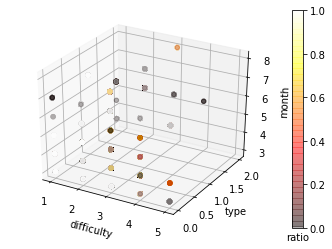

In [50]:
analysis_4d(df_difficulty_type_time_ratio, 'difficulty', 'type', 'month')

### [4d] ratio distirbution for each type & difficulty & hour

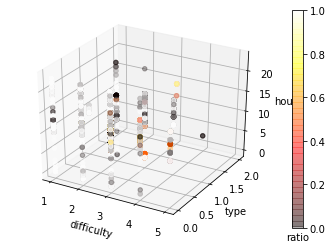

In [51]:
analysis_4d(df_difficulty_type_updated_at_ratio, 'difficulty', 'type', 'hour')

### [4d] ratio distirbution for each difficulty & type & count

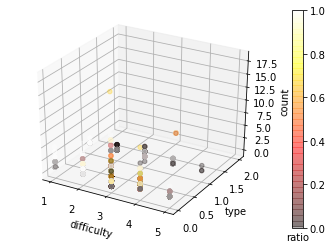

In [52]:
analysis_4d(df_difficulty_type_count_ratio, 'difficulty', 'type', 'count')